#  <center> Marketing Insights <center>

In [1]:
#Packages related to general operating system & warnings
import os 
import warnings
warnings.filterwarnings('ignore')

#Packages related to data importing, manipulation, exploratory data analysis, data understanding
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import pandas_profiling
import scipy.stats as stats

#Packages related to data visualizaiton
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Setting plot sizes and type of plot
plt.rc("font", size=14)
plt.rcParams['axes.grid'] = True
plt.figure(figsize=(6,3))
plt.gray()

from matplotlib.backends.backend_pdf import PdfPages

#Modules related to split the data & gridsearch
from sklearn.model_selection import train_test_split, GridSearchCV

#Module related to calculation of metrics
from sklearn import metrics

#Module related to VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Modules related to preprocessing (Imputation of missings, standardiszation, new features creation, converting categorical to numerical)
from sklearn.impute import MissingIndicator, SimpleImputer
from sklearn.preprocessing import  PolynomialFeatures, KBinsDiscretizer, FunctionTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer, OrdinalEncoder

#Moudles related to feature selection
from sklearn.feature_selection import RFE, RFECV, SelectKBest, chi2, SelectPercentile, f_classif, mutual_info_classif, f_regression, VarianceThreshold, SelectFromModel, mutual_info_classif, mutual_info_regression, SelectFpr, SelectFdr, SelectFwe


#Modules related to pipe line creation for faster processing
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
#from sklearn.features.transformers import DataFrameSelector

#Modules related to saving python objects permanantly
#from sklearn.externals import joblib

#Dumping model into current directory: joblib.dump(model_xg,"my_model.pkl") 
#Loading model: my_model_loaded=joblib.load("my_model.pkl")

#Modules related key techniques of supervised learning 
import statsmodels.formula.api as smf
import statsmodels.tsa as tsa

from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor,RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor 
from xgboost import XGBClassifier, XGBRegressor
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
from sklearn.neural_network import MLPClassifier, MLPRegressor

<Figure size 432x216 with 0 Axes>

In [2]:
#importing the data
online_sales=pd.read_csv('Online_Sales.csv',parse_dates=['Transaction_Date'])
customers_data=pd.read_excel('CustomersData.xlsx')
discount_coupon=pd.read_csv('Discount_Coupon.csv')
tax_amount=pd.read_excel('Tax_amount.xlsx')
marketing_spend=pd.read_csv('Marketing_Spend.csv',parse_dates=['Date'])

In [3]:
#removing additional spaces from column names
online_sales.columns=[ i.strip() for i in online_sales.columns]
customers_data.columns=[ i.strip() for i in customers_data.columns]
discount_coupon.columns=[ i.strip() for i in discount_coupon.columns]
tax_amount.columns=[ i.strip() for i in tax_amount.columns]
marketing_spend.columns=[ i.strip() for i in marketing_spend.columns]

In [4]:
marketing_spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           365 non-null    datetime64[ns]
 1   Offline_Spend  365 non-null    int64         
 2   Online_Spend   365 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 8.7 KB


In [5]:
customers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     1468 non-null   int64 
 1   Gender         1468 non-null   object
 2   Location       1468 non-null   object
 3   Tenure_Months  1468 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.0+ KB


In [6]:
online_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52924 non-null  int64         
 1   Transaction_ID       52924 non-null  int64         
 2   Transaction_Date     52924 non-null  datetime64[ns]
 3   Product_SKU          52924 non-null  object        
 4   Product_Description  52924 non-null  object        
 5   Product_Category     52924 non-null  object        
 6   Quantity             52924 non-null  int64         
 7   Avg_Price            52924 non-null  float64       
 8   Delivery_Charges     52924 non-null  float64       
 9   Coupon_Status        52924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 4.0+ MB


In [7]:
discount_coupon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Month             204 non-null    object
 1   Product_Category  204 non-null    object
 2   Coupon_Code       204 non-null    object
 3   Discount_pct      204 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.5+ KB


In [8]:
discount_coupon

,Month,Product_Category,Coupon_Code,Discount_pct
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20
...,...,...,...,...
199,Nov,Notebooks & Journals,NJ20,20
200,Dec,Notebooks & Journals,NJ30,30
201,Oct,Android,AND10,10
202,Nov,Android,AND20,20


In [9]:
tax_amount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_Category  20 non-null     object 
 1   GST               20 non-null     float64
dtypes: float64(1), object(1)
memory usage: 448.0+ bytes


### Data Analysis

In [10]:
discount_coupon['Discount_pct']=discount_coupon['Discount_pct'] / 100
online_sales['Month']=online_sales.Transaction_Date.dt.month_name()
discount_coupon['Month']=pd.to_datetime(discount_coupon.Month,format=('%b')).dt.month_name()

In [11]:
onlin_sle_tx_dis=pd.merge(left=(pd.merge(left=online_sales,right=tax_amount,on='Product_Category',how='inner')),right=discount_coupon,on=['Product_Category','Month'],how='inner')
onlin_sle_tx_dis['invoice_value']=((onlin_sle_tx_dis.Quantity*onlin_sle_tx_dis.Avg_Price)*(1-onlin_sle_tx_dis.Discount_pct)*(1+onlin_sle_tx_dis.GST))+onlin_sle_tx_dis.Delivery_Charges
data=pd.merge(left=onlin_sle_tx_dis,right=customers_data,on='CustomerID',how='inner')
Month=['January','February','March','April','May','June','July','August','September','October','November','December']
data['Month'] = pd.Categorical(data['Month'], categories=Month, ordered=True)

### EDA

In [12]:
# Calculate invoice amount or sale or revenue amount for each transaction and item level
onlin_sle_tx_dis['invoice_value']

0        158.67290
1        158.67290
2        249.58460
3         87.18500
4        128.04230
           ...    
52519    267.96890
52520     80.66885
52521     80.66885
52522     80.66885
52523    229.00655
Name: invoice_value, Length: 52524, dtype: float64

In [13]:
#customers accquired every month
df_acc=online_sales.groupby('CustomerID')['Transaction_Date'].min().to_frame()
df_acc['month_acc']=df_acc.Transaction_Date.dt.month_name()
df_acc.groupby('month_acc')['Transaction_Date'].count()

month_acc
April        163
August       135
December     106
February      96
January      215
July          94
June         137
March        177
May          112
November      68
October       87
September     78
Name: Transaction_Date, dtype: int64

In [14]:
# Retention of customers on month on month basis
df_ret=pd.merge(left=online_sales,right=df_acc.reset_index().loc[:,['CustomerID','month_acc']],on='CustomerID',how='inner')
df_ret=df_ret.sort_values(by='Transaction_Date')
df_ret.drop_duplicates(subset='Transaction_ID',keep='first',inplace=True)
df_ret=pd.crosstab(df_ret.Month,df_ret.month_acc)
df_ret=df_ret.loc[:,['January','February','March','April','May','June','July','August','September','October','November','December']].T
df_ret=df_ret.loc[:,['January','February','March','April','May','June','July','August','September','October','November','December']]
df_ret

Month,January,February,March,April,May,June,July,August,September,October,November,December
month_acc,,,,,,,,,,,,
January,2102,212,280,333,199,333,366,309,226,239,182,441
February,0,1452,56,81,146,136,258,155,213,88,121,259
March,0,0,1655,158,218,149,240,330,259,179,124,207
April,0,0,0,1241,114,113,171,112,152,61,229,93
May,0,0,0,0,1357,49,84,95,88,216,162,64
June,0,0,0,0,0,1160,77,78,96,73,185,92
July,0,0,0,0,0,0,884,102,30,85,96,149
August,0,0,0,0,0,0,0,1233,54,59,124,76
September,0,0,0,0,0,0,0,0,814,11,16,3


In [15]:
# Count of existing customer and on month on month basis
df_rev=pd.merge(left=onlin_sle_tx_dis,right=df_acc.reset_index().loc[:,['CustomerID','month_acc']],on='CustomerID',how='inner')
df_rev=df_rev.sort_values(by='Transaction_Date')
New_count=df_rev[df_rev.Month == df_rev.month_acc].drop_duplicates(subset='Transaction_ID',keep='first').groupby('month_acc')['Transaction_ID'].count().to_frame()
Existing_count=df_rev[df_rev.Month != df_rev.month_acc].drop_duplicates(subset='Transaction_ID',keep='first').groupby('Month')['Transaction_ID'].count()
#adding january to existing data
Existing_count=Existing_count.append(pd.Series({'January':0})).to_frame()
df=pd.concat([New_count,Existing_count],axis=1).T
df.index=['New','Existing']
df.loc[:,['January','February','March','April','May','June','July','August','September','October','November','December']].T

,New,Existing
January,2096,0
February,1455,218
March,1670,349
April,1268,595
May,1372,705
June,1183,811
July,922,1235
August,1299,1218
September,837,1142
October,1135,1038


In [16]:
# Revenue from existing customer and on month on month basis
New_rev=df_rev[df_rev.Month == df_rev.month_acc].groupby('month_acc')['invoice_value'].sum().to_frame()
Existing_rev=df_rev[df_rev.Month != df_rev.month_acc].groupby('Month')['invoice_value'].sum()
#adding january to existing data
Existing_rev=Existing_rev.append(pd.Series({'January':0})).to_frame()
df=pd.concat([New_rev,Existing_rev],axis=1).T
df.index=['New','Existing']
df.loc[:,['January','February','March','April','May','June','July','August','September','October','November','December']].T

,New,Existing
January,460087.03245,0.00000
February,283400.30552,40930.36168
March,276490.38271,54433.58872
April,261083.53827,180890.84676
May,200413.41288,113224.55648
June,170882.56280,116242.68791
July,166792.62243,252991.58518
August,199470.65440,216228.51744
September,131400.65575,188647.56623
October,240347.30434,208591.80921


<AxesSubplot:xlabel='qtr,Month'>

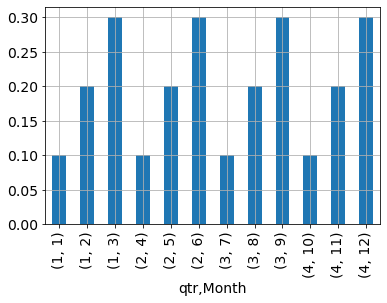

In [17]:
# Role of discount in revenues
df_dis=onlin_sle_tx_dis.copy()
df_dis['qtr']=df_dis.Transaction_Date.dt.quarter
df_dis['Month']=pd.to_datetime(df_dis.Month,format=('%B')).dt.month
df_dis.groupby(['qtr','Month'])['Discount_pct'].mean().plot.bar()

<AxesSubplot:xlabel='qtr,Month'>

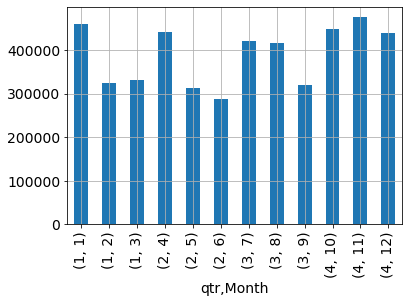

In [18]:
df_dis.groupby(['qtr','Month'])['invoice_value'].sum().plot.bar()

In [19]:
# Revenue by Category
onlin_sle_tx_dis.groupby('Product_Category')['invoice_value'].sum()

Product_Category
Accessories             9.277126e+03
Android                 9.860494e+02
Apparel                 7.354504e+05
Bags                    1.688531e+05
Bottles                 9.309917e+03
Drinkware               2.402678e+05
Gift Cards              1.757481e+04
Headgear                5.345419e+04
Housewares              6.372834e+03
Lifestyle               1.145590e+05
Nest                    4.399770e+05
Nest-Canada             6.554575e+04
Nest-USA                2.351316e+06
Notebooks & Journals    1.093681e+05
Office                  3.440001e+05
Waze                    1.125057e+04
Name: invoice_value, dtype: float64

In [20]:
# Revenue by location
data.groupby('Location')['invoice_value'].sum()

Location
California       1.443144e+06
Chicago          1.625331e+06
New Jersey       4.043138e+05
New York         9.479778e+05
Washington DC    2.567961e+05
Name: invoice_value, dtype: float64

In [21]:
# Revenue by month
data.groupby('Month')['invoice_value'].sum()

Month
January      460087.03245
February     324330.66720
March        330923.97143
April        441974.38503
May          313637.96936
June         287125.25071
July         419784.20761
August       415699.17184
September    320048.22198
October      448939.11355
November     475482.19736
December     439530.03015
Name: invoice_value, dtype: float64

In [22]:
# Revenue by week
data.groupby(data.Transaction_Date.dt.week)['invoice_value'].sum()

Transaction_Date
1     118766.81321
2      97517.18964
3     100179.21023
4     102485.49350
5      94269.46201
6      77953.68496
7      86625.23216
8      84928.37736
9      69512.49411
10     73625.12630
11     64037.69610
12     86864.66178
13     73373.43562
14    120467.33112
15     85842.63242
16    135477.93524
17     86759.65202
18     73221.00423
19     70089.08600
20     66034.29720
21     67711.40264
22     68511.97716
23     57961.17522
24     77589.96319
25     68241.27630
26     64829.87236
27     72898.14288
28    103734.03029
29    117137.27156
30     88872.99746
31    121771.48142
32     92175.98040
33     83272.87536
34     85002.20752
35     86452.69003
36     57198.59618
37     81299.41116
38     64753.51857
39     93132.87767
40     96865.38152
41    113711.84486
42    100378.69124
43     93723.18094
44     94768.42240
45     90864.83168
46     96437.08928
47    118632.34136
48    137618.28380
49    115304.19899
50    125861.49715
51    115155.11691
52     57662.7

In [23]:
# Revenue by day
data.groupby(data.Transaction_Date.dt.day)['invoice_value'].sum()

Transaction_Date
1     144714.53689
2     143398.54656
3     141994.83801
4     137033.72052
5     182914.70168
6     158478.36827
7     157969.24978
8     133133.72638
9     144096.64082
10    151062.44936
11    148715.47597
12    144088.71767
13    189005.72572
14    168348.12185
15    144902.24196
16    150964.38554
17    144430.88324
18    210760.95247
19    158061.37915
20    147146.46228
21    154388.43375
22    161223.40830
23    143980.64941
24    157518.13958
25    124448.78788
26    133626.72601
27    204837.71139
28    139921.39156
29    112308.87402
30    135389.64028
31    108697.33237
Name: invoice_value, dtype: float64

In [24]:
# Quantity by category
data.groupby('Product_Category')['Quantity'].sum()

Product_Category
Accessories              1097
Android                    45
Apparel                 32438
Bags                    15273
Bottles                  2090
Drinkware               30501
Gift Cards                206
Headgear                 3533
Housewares               2484
Lifestyle               24881
Nest                     2837
Nest-Canada               469
Nest-USA                21430
Notebooks & Journals     9556
Office                  88383
Waze                     1144
Name: Quantity, dtype: int64

In [25]:
# Quantity by location
data.groupby('Location')['Quantity'].sum()

Location
California       72106
Chicago          83330
New Jersey       22455
New York         46207
Washington DC    12269
Name: Quantity, dtype: int64

In [26]:
# Quantity by by month
data.groupby('Month')['Quantity'].sum()

Month
January      19987
February     16410
March        20543
April        24922
May          18519
June         21482
July         22613
August       27379
September    19329
October      17400
November     15116
December     12667
Name: Quantity, dtype: int64

In [27]:
# Quantity by week
data.groupby(data.Transaction_Date.dt.week)['Quantity'].sum()

Transaction_Date
1     5937
2     4638
3     4311
4     3041
5     4226
6     3645
7     5224
8     3591
9     3618
10    4469
11    4030
12    5099
13    5344
14    8253
15    4706
16    6839
17    4612
18    4187
19    4841
20    4272
21    3520
22    3485
23    5787
24    7873
25    3215
26    3333
27    3889
28    4108
29    6648
30    5538
31    9449
32    5301
33    5194
34    6461
35    4548
36    4033
37    5652
38    3447
39    4473
40    3776
41    4123
42    4302
43    3878
44    3371
45    3527
46    2918
47    2789
48    4774
49    4209
50    4655
51    2352
52     856
Name: Quantity, dtype: int64

In [28]:
# Quantity by day
data.groupby(data.Transaction_Date.dt.day)['Quantity'].sum()

Transaction_Date
1      7158
2      7552
3      6512
4      6911
5     13092
6      8115
7      8147
8      7943
9      7302
10     7764
11     6456
12     8242
13     9834
14    10794
15     7164
16     8268
17     5951
18    11052
19     7204
20     7696
21     7504
22     7248
23     5813
24     5698
25     5480
26     6169
27     9700
28     7997
29     5064
30     6315
31     6222
Name: Quantity, dtype: int64

In [29]:
#Average order value by Category
data.groupby('Product_Category')['invoice_value'].mean()

Product_Category
Accessories              39.645837
Android                  22.931381
Apparel                  40.574337
Bags                     89.720012
Bottles                  34.738496
Drinkware                68.982990
Gift Cards              110.533381
Headgear                 69.330990
Housewares               52.236342
Lifestyle                37.050117
Nest                    200.171512
Nest-Canada             206.768934
Nest-USA                167.795300
Notebooks & Journals    146.018878
Office                   52.817456
Waze                     20.307894
Name: invoice_value, dtype: float64

In [30]:
#Average order value by location
data.groupby('Location')['invoice_value'].mean()

Location
California       90.151417
Chicago          89.108044
New Jersey       90.450511
New York         85.426491
Washington DC    94.793675
Name: invoice_value, dtype: float64

In [31]:
#Average order value by month
data.groupby('Month')['invoice_value'].mean()

Month
January      114.364164
February      99.947817
March         77.138455
April        107.851241
May           69.450392
June          69.037088
July          80.789878
August        68.013608
September     74.900122
October      108.099955
November     120.162294
December      97.629949
Name: invoice_value, dtype: float64

In [32]:
#Average order value by week
data.groupby(data.Transaction_Date.dt.week)['invoice_value'].mean()

Transaction_Date
1     113.761315
2     118.634051
3     119.831591
4     109.727509
5     103.365638
6     104.635819
7      99.454916
8      98.410634
9      86.565995
10     73.772672
11     72.935873
12     81.030468
13     80.807748
14    127.884640
15     85.161342
16    124.749480
17     97.922858
18     64.912238
19     69.395135
20     66.499796
21     72.496148
22     73.196557
23     68.593107
24     70.280764
25     67.969399
26     72.274105
27     94.796025
28     80.538843
29     84.150339
30     72.549386
31     80.696807
32     66.794189
33     62.005119
34     65.436649
35     65.743491
36     55.211000
37     83.213317
38     71.948354
39     91.576084
40     95.433873
41    110.830258
42    124.849118
43    101.212938
44     98.103957
45    123.625621
46    107.992261
47    132.107284
48    123.868842
49     91.802706
50    100.048885
51     94.777874
52    112.622609
Name: invoice_value, dtype: float64

In [33]:
#Average order value by day
data.groupby(data.Transaction_Date.dt.day)['invoice_value'].mean()

Transaction_Date
1      84.529519
2      90.301352
3      82.555138
4      79.485917
5     106.469559
6      84.974996
7      86.939598
8      87.472882
9      90.229581
10     94.296161
11     80.517312
12     83.192100
13     92.063188
14     92.600727
15     91.133486
16     87.363649
17     80.642593
18    106.930975
19     85.531049
20     88.695878
21     87.521788
22     93.898316
23     96.566499
24     94.548703
25     82.144414
26     81.133410
27    100.116183
28     84.646940
29     88.432184
30     83.988611
31     87.588503
Name: invoice_value, dtype: float64

In [34]:
# Number of order by Category
data.groupby('Product_Category')['Transaction_ID'].count()

Product_Category
Accessories               234
Android                    43
Apparel                 18126
Bags                     1882
Bottles                   268
Drinkware                3483
Gift Cards                159
Headgear                  771
Housewares                122
Lifestyle                3092
Nest                     2198
Nest-Canada               317
Nest-USA                14013
Notebooks & Journals      749
Office                   6513
Waze                      554
Name: Transaction_ID, dtype: int64

In [35]:
# Number of order by location
data.groupby('Location')['Transaction_ID'].count()

Location
California       16008
Chicago          18240
New Jersey        4470
New York         11097
Washington DC     2709
Name: Transaction_ID, dtype: int64

In [36]:
# Number of order by Month
data.groupby('Month')['Transaction_ID'].count()

Month
January      4023
February     3245
March        4290
April        4098
May          4516
June         4159
July         5196
August       6112
September    4273
October      4153
November     3957
December     4502
Name: Transaction_ID, dtype: int64

In [37]:
# Number of order by week
data.groupby(data.Transaction_Date.dt.week)['Transaction_ID'].count()

Transaction_Date
1     1044
2      822
3      836
4      934
5      912
6      745
7      871
8      863
9      803
10     998
11     878
12    1072
13     908
14     942
15    1008
16    1086
17     886
18    1128
19    1010
20     993
21     934
22     936
23     845
24    1104
25    1004
26     897
27     769
28    1288
29    1392
30    1225
31    1509
32    1380
33    1343
34    1299
35    1315
36    1036
37     977
38     900
39    1017
40    1015
41    1026
42     804
43     926
44     966
45     735
46     893
47     898
48    1111
49    1256
50    1258
51    1215
52     512
Name: Transaction_ID, dtype: int64

In [38]:
# Number of order by day
data.groupby(data.Transaction_Date.dt.day)['Transaction_ID'].count()

Transaction_Date
1     1712
2     1588
3     1720
4     1724
5     1718
6     1865
7     1817
8     1522
9     1597
10    1602
11    1847
12    1732
13    2053
14    1818
15    1590
16    1728
17    1791
18    1971
19    1848
20    1659
21    1764
22    1717
23    1491
24    1666
25    1515
26    1647
27    2046
28    1653
29    1270
30    1612
31    1241
Name: Transaction_ID, dtype: int64

In [39]:
# Number of new/existing customer by category
df_rev=pd.merge(left=data,right=df_acc.reset_index().loc[:,['CustomerID','month_acc']],on='CustomerID',how='inner')
df_rev=df_rev.sort_values(by='Transaction_Date')
New_count=df_rev[df_rev.Month == df_rev.month_acc].drop_duplicates(subset='Transaction_ID',keep='first').groupby(['Product_Category','month_acc'])['Transaction_ID'].count().to_frame()
New_count.reset_index(inplace=True)
New_count.columns=['Product_Category','month_acc','new_count']
Existing_count=df_rev[df_rev.Month != df_rev.month_acc].drop_duplicates(subset='Transaction_ID',keep='first').groupby(['Product_Category','Month'])['Transaction_ID'].count().to_frame()
Existing_count.reset_index(inplace=True)
Existing_count.columns=['Product_Category','month_acc','existing_count']
df=pd.merge(left=New_count,right=Existing_count,on=['Product_Category','month_acc'],how='outer')
month_acc=['January','February','March','April','May','June','July','August','September','October','November','December']
df['month_acc'] = pd.Categorical(df['month_acc'], categories=month_acc, ordered=True)
df.sort_values(by=['Product_Category','month_acc'])


,Product_Category,month_acc,new_count,existing_count
3,Accessories,January,1.0,0
168,Accessories,February,NaN,0
4,Accessories,March,1.0,0
0,Accessories,April,2.0,0
5,Accessories,May,1.0,0
...,...,...,...,...
157,Waze,August,9.0,21
167,Waze,September,8.0,7
166,Waze,October,6.0,8
165,Waze,November,18.0,17


In [41]:
# Number of new/existing customer by Location
df_rev=pd.merge(left=data,right=df_acc.reset_index().loc[:,['CustomerID','month_acc']],on='CustomerID',how='inner')
df_rev=df_rev.sort_values(by='Transaction_Date')
New_count=df_rev[df_rev.Month == df_rev.month_acc].drop_duplicates(subset='Transaction_ID',keep='first').groupby(['Location','month_acc'])['Transaction_ID'].count().to_frame()
New_count.reset_index(inplace=True)
New_count.columns=['Location','month_acc','new_count']
Existing_count=df_rev[df_rev.Month != df_rev.month_acc].drop_duplicates(subset='Transaction_ID',keep='first').groupby(['Location','Month'])['Transaction_ID'].count().to_frame()
Existing_count.reset_index(inplace=True)
Existing_count.columns=['Location','month_acc','existing_count']
df=pd.merge(left=New_count,right=Existing_count,on=['Location','month_acc'],how='outer')
month_acc=['January','February','March','April','May','June','July','August','September','October','November','December']
df['month_acc'] = pd.Categorical(df['month_acc'], categories=month_acc, ordered=True)
df.sort_values(by=['Location','month_acc'])

,Location,month_acc,new_count,existing_count
4,California,January,760,0
3,California,February,457,73
7,California,March,486,78
0,California,April,409,226
8,California,May,435,210
6,California,June,377,245
5,California,July,153,445
1,California,August,366,289
11,California,September,239,372
10,California,October,304,278


In [42]:
# Number of new/existing customer by week
df_rev=pd.merge(left=data,right=df_acc.reset_index().loc[:,['CustomerID','month_acc']],on='CustomerID',how='inner')
df_rev=df_rev.sort_values(by='Transaction_Date')
New_count=df_rev[df_rev.Month == df_rev.month_acc].drop_duplicates(subset='Transaction_ID',keep='first').groupby([data.Transaction_Date.dt.week,'month_acc'])['Transaction_ID'].count().to_frame()
New_count.reset_index(inplace=True)
New_count.columns=['Week','month_acc','new_count']
Existing_count=df_rev[df_rev.Month != df_rev.month_acc].drop_duplicates(subset='Transaction_ID',keep='first').groupby([data.Transaction_Date.dt.week,'Month'])['Transaction_ID'].count().to_frame()
Existing_count.reset_index(inplace=True)
Existing_count.columns=['Week','month_acc','existing_count']
df=pd.merge(left=New_count,right=Existing_count,on=['Week','month_acc'],how='outer')
month_acc=['January','February','March','April','May','June','July','August','September','October','November','December']
df['month_acc'] = pd.Categorical(df['month_acc'], categories=month_acc, ordered=True)
df.sort_values(by=['Week','month_acc'])

,Week,month_acc,new_count,existing_count
1,1,January,482.0,0.0
62,1,February,NaN,0.0
63,1,March,NaN,0.0
64,1,April,NaN,0.0
65,1,May,NaN,0.0
...,...,...,...,...
576,52,August,NaN,0.0
577,52,September,NaN,0.0
578,52,October,NaN,0.0
579,52,November,NaN,0.0


In [43]:
# Number of new/existing customer by Day
df_rev=pd.merge(left=data,right=df_acc.reset_index().loc[:,['CustomerID','month_acc']],on='CustomerID',how='inner')
df_rev=df_rev.sort_values(by='Transaction_Date')
New_count=df_rev[df_rev.Month == df_rev.month_acc].drop_duplicates(subset='Transaction_ID',keep='first').groupby([data.Transaction_Date.dt.day,'month_acc'])['Transaction_ID'].count().to_frame()
New_count.reset_index(inplace=True)
New_count.columns=['Day','month_acc','new_count']
Existing_count=df_rev[df_rev.Month != df_rev.month_acc].drop_duplicates(subset='Transaction_ID',keep='first').groupby([data.Transaction_Date.dt.day,'Month'])['Transaction_ID'].count().to_frame()
Existing_count.reset_index(inplace=True)
Existing_count.columns=['Day','month_acc','existing_count']
df=pd.merge(left=New_count,right=Existing_count,on=['Day','month_acc'],how='outer')
month_acc=['January','February','March','April','May','June','July','August','September','October','November','December']
df['month_acc'] = pd.Categorical(df['month_acc'], categories=month_acc, ordered=True)
df.sort_values(by=['Day','month_acc'])

,Day,month_acc,new_count,existing_count
4,1,January,41.0,0
3,1,February,54.0,17
7,1,March,49.0,25
0,1,April,15.0,19
8,1,May,37.0,84
...,...,...,...,...
352,31,August,41.0,57
370,31,September,NaN,0
358,31,October,10.0,53
371,31,November,NaN,0


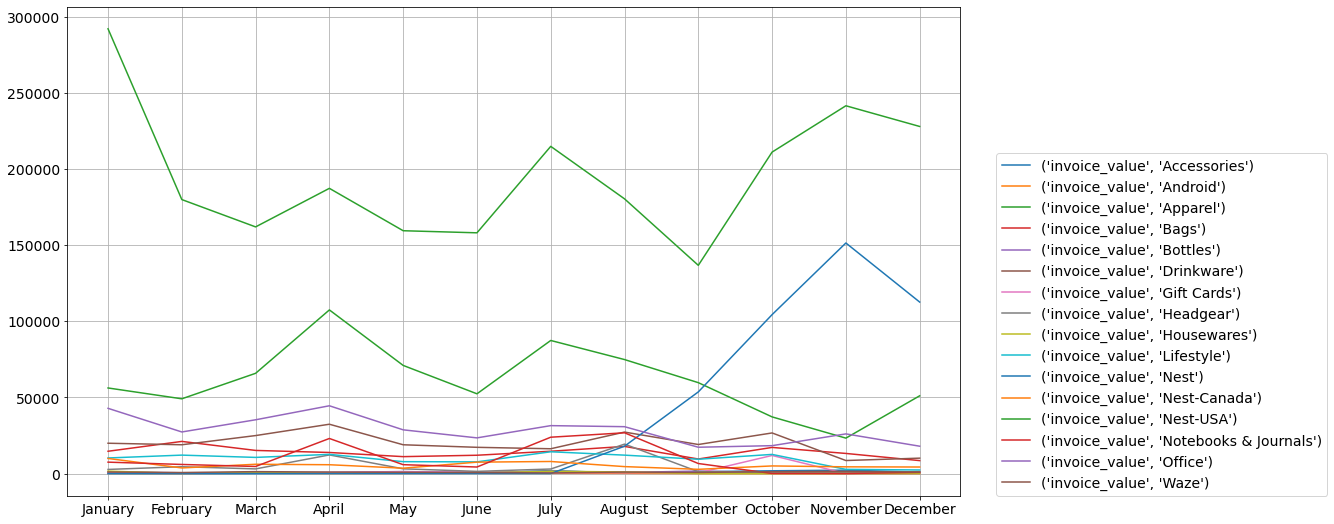

In [44]:
# Trend of sales by category
x=pd.pivot_table(data=data,index='Month',columns=['Product_Category'],values=['invoice_value'],aggfunc='sum')
plt.figure(figsize=(16,9))
plt.plot(x,label=x.columns)
plt.legend(loc=(1.04,0))
plt.show()

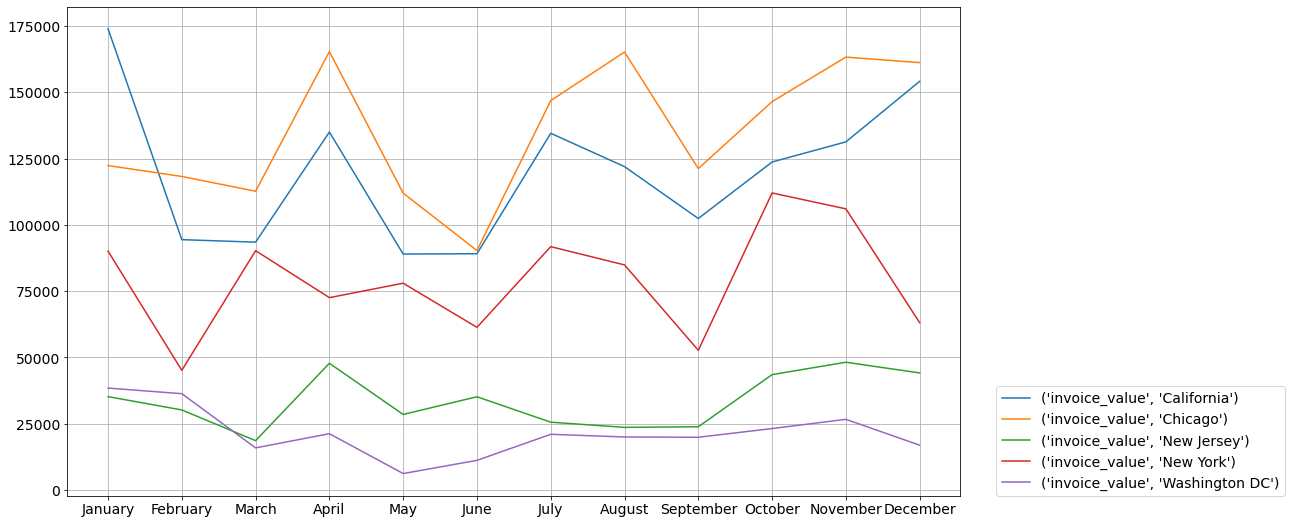

In [45]:
# Trend of sales by location
x=pd.pivot_table(data=data,index='Month',columns=['Location'],values=['invoice_value'],aggfunc='sum')
plt.figure(figsize=(16,9))
plt.plot(x,label=x.columns)
plt.legend(loc=(1.04,0))
plt.show()

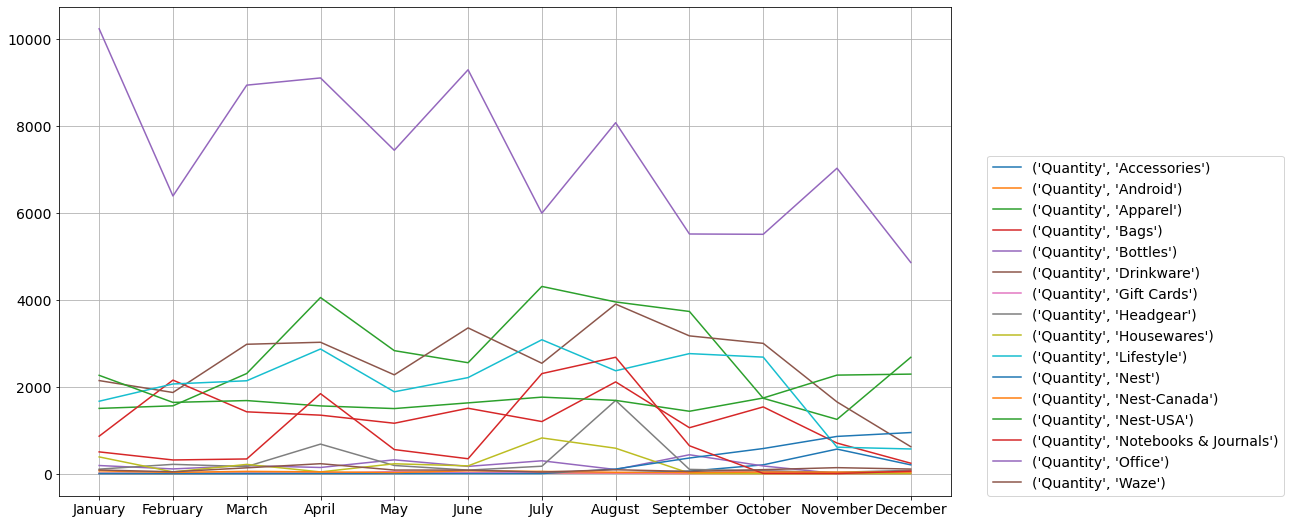

In [46]:
# Trend of Quantity by category
x=pd.pivot_table(data=data,index='Month',columns=['Product_Category'],values=['Quantity'],aggfunc='sum')
plt.figure(figsize=(16,9))
plt.plot(x,label=x.columns)
plt.legend(loc=(1.04,0))
plt.show()

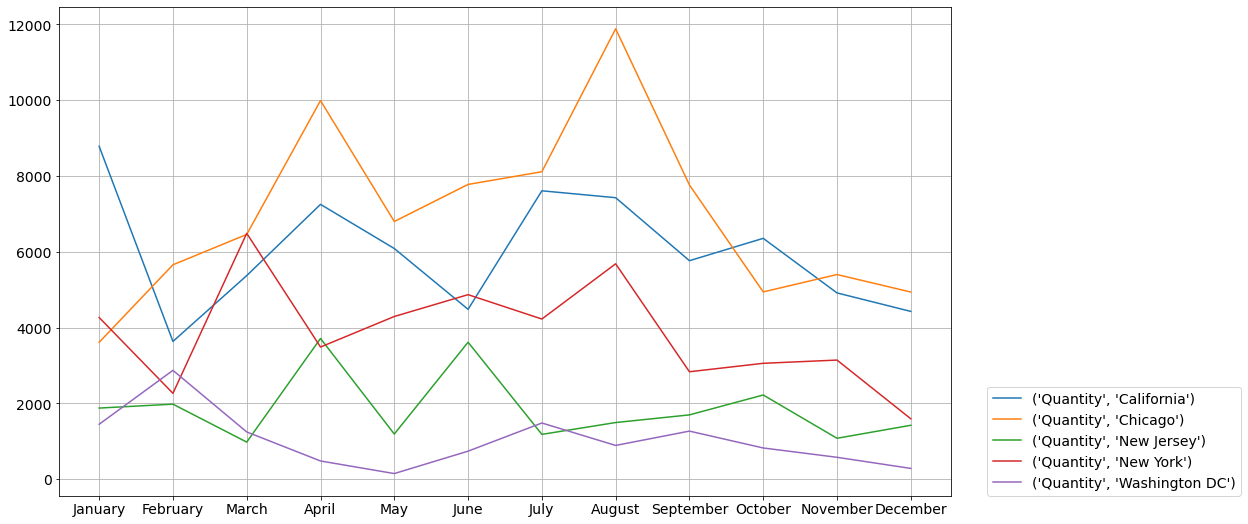

In [47]:
# Trend of Quantity by location
x=pd.pivot_table(data=data,index='Month',columns=['Location'],values=['Quantity'],aggfunc='sum')
plt.figure(figsize=(16,9))
plt.plot(x,label=x.columns)
plt.legend(loc=(1.04,0))
plt.show()

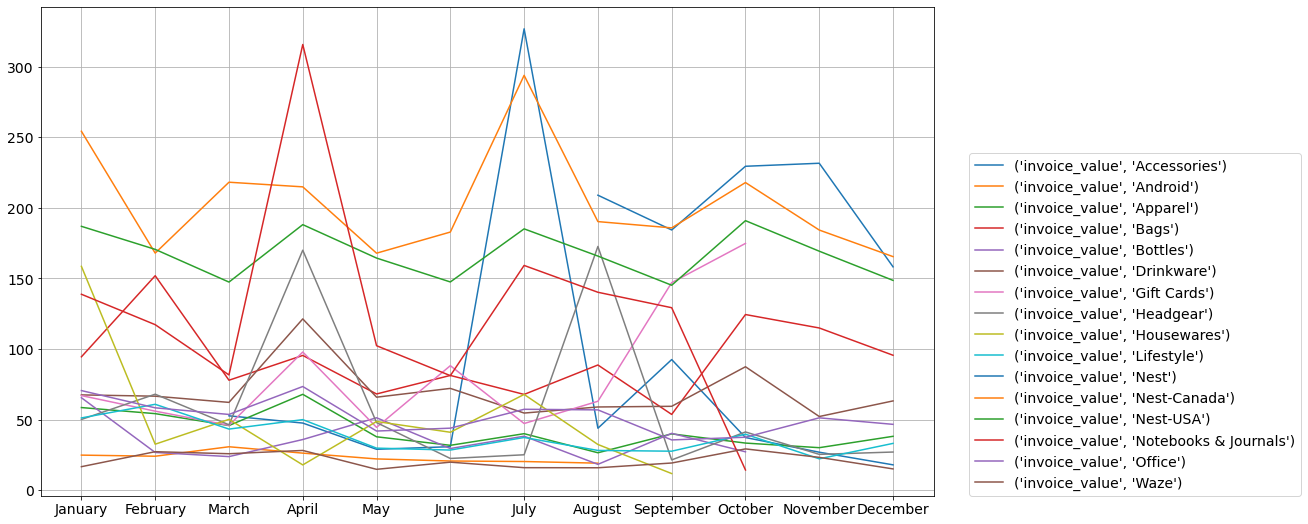

In [48]:
# Trend of average order by category
x=pd.pivot_table(data=data,index='Month',columns=['Product_Category'],values=['invoice_value'],aggfunc='mean')
plt.figure(figsize=(16,9))
plt.plot(x,label=x.columns)
plt.legend(loc=(1.04,0))
plt.show()

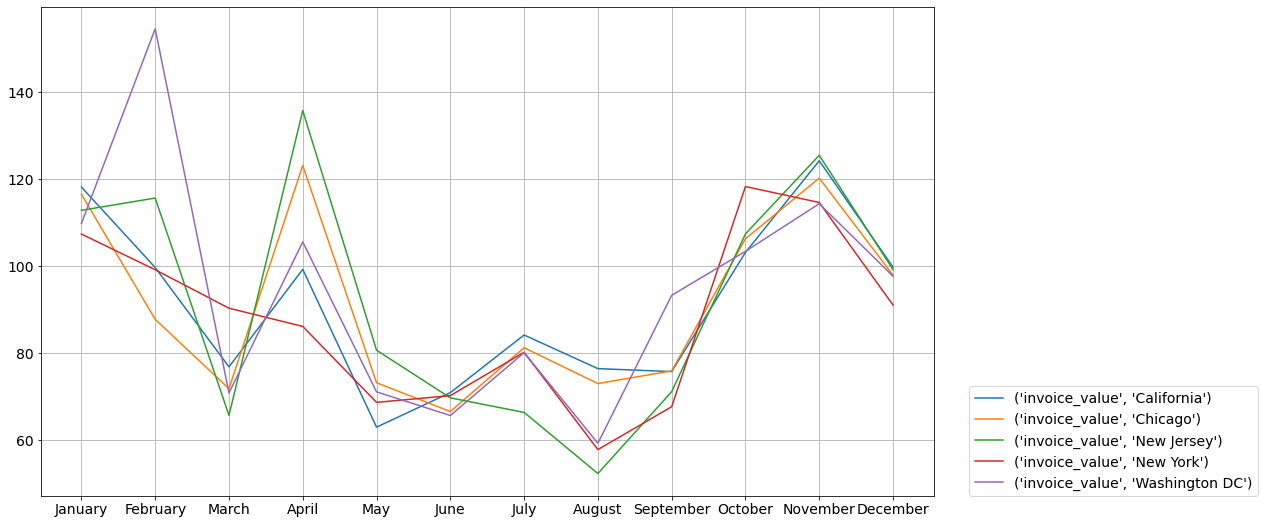

In [49]:
# Trend of average order by location
x=pd.pivot_table(data=data,index='Month',columns=['Location'],values=['invoice_value'],aggfunc='mean')
plt.figure(figsize=(16,9))
plt.plot(x,label=x.columns)
plt.legend(loc=(1.04,0))
plt.show()

<AxesSubplot:xlabel='Week_day'>

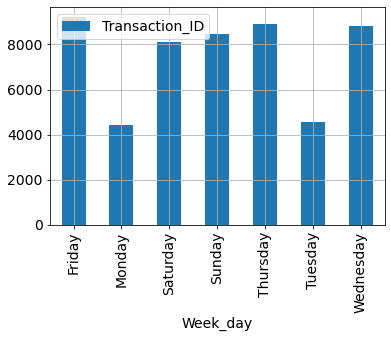

In [50]:
# how number of order varies with different day
x=data.copy()
x['Week_day']=x.Transaction_Date.dt.day_name()
pd.pivot_table(data=x,index='Week_day',values='Transaction_ID',aggfunc='count').plot.bar()

<AxesSubplot:xlabel='Week_day'>

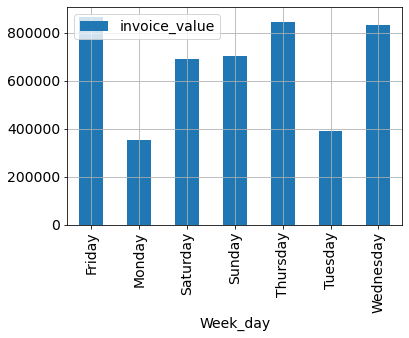

In [51]:
# how sales varies with different day
x=data.copy()
x['Week_day']=x.Transaction_Date.dt.day_name()
pd.pivot_table(data=x,index='Week_day',values='invoice_value',aggfunc='sum').plot.bar()

In [52]:
# Revenue, marketing spend,percentage of marketing spend out of revenue, tax, percentage of delivey charges by month.
rev=data.copy()
rev['tax']=rev.invoice_value*rev.GST
rev=rev.groupby('Month')['invoice_value','tax','Delivery_Charges'].sum()
mark_spd=marketing_spend.groupby(marketing_spend.Date.dt.month_name())['Offline_Spend','Online_Spend'].sum().sum(axis=1)
df=pd.concat([rev,mark_spd],axis=1)
df.columns=['Revenue','Tax','Per_delivey','Marketing_Spend']
df['Percentage_marketing_spend']=df.Marketing_Spend/df.Revenue
df['Per_delivey']=df.Per_delivey/df.Revenue
df

,Revenue,Tax,Per_delivey,Marketing_Spend,Percentage_marketing_spend
January,460087.03245,53626.393046,0.126936,154928.95,0.336738
February,324330.66720,40023.339722,0.149398,137107.92,0.422741
March,330923.97143,42108.991328,0.179269,122250.09,0.369420
April,441974.38503,55748.819308,0.092607,157026.83,0.355285
May,313637.96936,39579.914805,0.129914,118259.64,0.377058
June,287125.25071,35558.895488,0.129058,134318.14,0.467803
July,419784.20761,51208.343745,0.114402,120217.85,0.286380
August,415699.17184,48962.150711,0.145766,142904.15,0.343768
September,320048.22198,36703.503923,0.127362,135514.54,0.423419
October,448939.11355,46594.648918,0.102078,151224.65,0.336849


<AxesSubplot:xlabel='invoice_value', ylabel='Total_spend'>

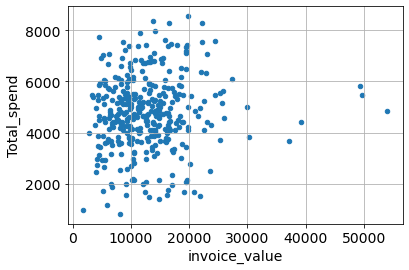

In [53]:
# Impact of marketing spend on revenue
df=pd.merge(left=marketing_spend,right=data.groupby('Transaction_Date')['invoice_value'].sum().to_frame().reset_index(),left_on='Date',right_on='Transaction_Date',how='inner')
df['Total_spend']=df.Offline_Spend+df.Online_Spend
df.drop(columns=['Offline_Spend','Online_Spend','Transaction_Date'],inplace=True)
df.plot(x='invoice_value',y='Total_spend',kind='scatter')

In [55]:
# Product in most number of transactions
df=online_sales.groupby('Product_Description')['Transaction_ID'].count().to_frame()
df['Basket_penetration']=df.Transaction_ID/df.Transaction_ID.sum()
df.sort_values(by='Basket_penetration',ascending=False,inplace=True)
df.index[0]

'Nest Learning Thermostat 3rd Gen-USA - Stainless Steel'

In [56]:
# Product with the largest quanity sold
online_sales.groupby('Product_Description')['Quantity'].sum().sort_values(ascending=False).index[0]

'Maze Pen'

### Creating Customer 360 file

In [36]:
customers_data.set_index('CustomerID',inplace=True)

In [37]:
# Number of transaction per customer
total_transaction=data.groupby('CustomerID')['Transaction_ID'].count()
#last transaction date
last_day=data.groupby('CustomerID')['Transaction_Date'].max()
#recency
recency=abs(last_day-data.Transaction_Date.max())
recency=recency.dt.days.astype('int32')
# Total delivery charges paid
delivery_charge=data.groupby('CustomerID')['Delivery_Charges'].sum()
# Total quantity ordered
quantity=data.groupby('CustomerID')['Quantity'].sum()
# Revenue per customer
revenue=data.groupby('CustomerID')['invoice_value'].sum()

In [38]:
# Number of coupns used
data['Coupon_used']=np.where(data.Coupon_Status=='Used',1,0)
Num_coupon_used=data.groupby('CustomerID')['Coupon_used'].sum()

In [39]:
#Total sales from categories with more than 5 percent share
data.Product_Category.value_counts()/(data.Product_Category.value_counts().sum())

Apparel                 0.345099
Nest-USA                0.266792
Office                  0.124000
Drinkware               0.066313
Lifestyle               0.058868
Nest                    0.041848
Bags                    0.035831
Headgear                0.014679
Notebooks & Journals    0.014260
Waze                    0.010548
Nest-Canada             0.006035
Bottles                 0.005102
Accessories             0.004455
Gift Cards              0.003027
Housewares              0.002323
Android                 0.000819
Name: Product_Category, dtype: float64

In [40]:
#Taking product category which are there in more than 5 percent of the transaction
cat_Apparel=data[data.Product_Category=='Apparel'].groupby('CustomerID')['invoice_value'].sum()
cat_Apparel.rename('Apparel',inplace=True)
cat_Nest_USA=data[data.Product_Category=='Nest-USA'].groupby('CustomerID')['invoice_value'].sum()
cat_Nest_USA.rename('Nest_USA',inplace=True)
cat_Office=data[data.Product_Category=='Office'].groupby('CustomerID')['invoice_value'].sum()
cat_Office.rename('Office',inplace=True)
cat_Drinkware=data[data.Product_Category=='Drinkware'].groupby('CustomerID')['invoice_value'].sum()
cat_Drinkware.rename('Drinkware',inplace=True)
cat_Lifestyle=data[data.Product_Category=='Lifestyle'].groupby('CustomerID')['invoice_value'].sum()
cat_Lifestyle.rename('Lifestyle',inplace=True)

CustomerID
12347     15.03408
12348     54.77174
12356     35.56400
12370    596.73040
12377    597.80360
           ...    
18212    205.84728
18219    105.29600
18223     81.15062
18239    169.93770
18283     85.19124
Name: Lifestyle, Length: 817, dtype: float64

In [41]:
#Joining all the different tables to make customer table.
cust_data=pd.concat([customers_data,revenue,total_transaction,quantity,delivery_charge,recency,Num_coupon_used,cat_Apparel,cat_Nest_USA,cat_Office,cat_Drinkware,cat_Lifestyle],axis=1)

In [42]:
cust_data.head()

,Gender,Location,Tenure_Months,invoice_value,Transaction_ID,Quantity,Delivery_Charges,Transaction_Date,Coupon_used,Apparel,Nest_USA,Office,Drinkware,Lifestyle
CustomerID,,,,,,,,,,,,,,
17850,M,Chicago,12,37649.28181,293,1125,3129.34,339,90,3221.10062,23712.5435,3824.5145,1717.05178,805.86430
13047,M,California,43,2876.28679,44,175,315.96,13,18,289.48504,1860.0888,243.9511,115.58916,16.34474
12583,M,Chicago,33,2987.77264,42,155,757.27,151,12,771.23084,971.3223,322.1861,492.42618,8.24168
13748,F,California,30,7.81688,1,1,6.50,364,0,NaN,NaN,NaN,NaN,7.81688
15100,M,California,49,904.97624,6,15,64.38,123,2,9.85152,843.3629,NaN,22.35070,NaN


In [43]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1468 entries, 17850 to 14600
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            1468 non-null   object 
 1   Location          1468 non-null   object 
 2   Tenure_Months     1468 non-null   int64  
 3   invoice_value     1468 non-null   float64
 4   Transaction_ID    1468 non-null   int64  
 5   Quantity          1468 non-null   int64  
 6   Delivery_Charges  1468 non-null   float64
 7   Transaction_Date  1468 non-null   int32  
 8   Coupon_used       1468 non-null   int32  
 9   Apparel           1323 non-null   float64
 10  Nest_USA          1260 non-null   float64
 11  Office            1103 non-null   float64
 12  Drinkware         919 non-null    float64
 13  Lifestyle         817 non-null    float64
dtypes: float64(7), int32(2), int64(3), object(2)
memory usage: 160.6+ KB


In [44]:
cust_data.isna().sum()

Gender                0
Location              0
Tenure_Months         0
invoice_value         0
Transaction_ID        0
Quantity              0
Delivery_Charges      0
Transaction_Date      0
Coupon_used           0
Apparel             145
Nest_USA            208
Office              365
Drinkware           549
Lifestyle           651
dtype: int64

In [45]:
#filling na with zero
cust_data.fillna(0,inplace=True)

In [46]:
cust_data.rename(columns={'invoice_value':'Revenue','Transaction_ID':'Frequency','Transaction_Date':'Recency'},inplace=True)

In [47]:
cust_data.describe(percentiles=np.arange(0,1,0.1))

,Tenure_Months,Revenue,Frequency,Quantity,Delivery_Charges,Recency,Coupon_used,Apparel,Nest_USA,Office,Drinkware,Lifestyle
count,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000
mean,25.912125,3186.350285,35.779292,161.012943,374.856846,144.292234,12.110354,500.988036,1601.713582,234.332487,163.670131,78.037440
std,13.959667,5090.259729,50.398903,308.812218,650.755315,101.936959,17.616999,1144.418650,2371.461899,551.240019,499.820053,211.641338
min,2.000000,6.990000,1.000000,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0%,2.000000,6.990000,1.000000,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,6.000000,196.356922,3.000000,6.000000,25.980000,19.700000,1.000000,9.779304,0.000000,0.000000,0.000000,0.000000
20%,11.000000,529.652430,8.000000,14.000000,58.912000,40.000000,2.000000,44.630852,158.672900,0.000000,0.000000,0.000000
30%,17.000000,867.210490,12.000000,24.000000,91.000000,69.000000,4.000000,86.551056,371.157210,9.941190,0.000000,0.000000
40%,21.000000,1238.271584,16.000000,39.000000,128.786000,99.000000,5.000000,137.564548,595.924000,27.100780,12.438940,0.000000
50%,26.000000,1770.545200,21.000000,60.500000,181.070000,131.000000,7.000000,209.091200,889.373100,56.451300,27.729380,10.121740


In [49]:
# Outlier Treatment of numerical variable
def outlier_capping(x):
    x = x.clip(lower=x.quantile(0.99),upper=x.quantile(0.01))
  
    return x
Num_data=cust_data[cust_data.columns.difference(['Gender','Location'])].apply(outlier_capping)

In [50]:
cust_data=pd.concat([cust_data[cust_data.columns.difference(Num_data.columns)],Num_data],axis=1)

In [51]:
# Changing categorical to numerical
cust_data['Gender']=np.where(cust_data.Gender=='M',1,0) #Label encoding

In [52]:
cust_data=pd.get_dummies(cust_data,'Location',drop_first=True)  #one hot encoding

## Segmentation

### Value Based Segmentation

In [53]:
cust_data['value_seg']=pd.qcut(cust_data.Revenue,4,labels=False)

In [54]:
cust_data.groupby('value_seg').mean().T

value_seg,0,1,2,3
Gender,0.332425,0.343324,0.400545,0.378747
Apparel,74.170764,191.969177,396.179083,1164.876735
Coupon_used,2.098093,5.299728,10.847411,28.043597
Delivery_Charges,49.443488,150.009373,314.612698,881.972837
Drinkware,17.308918,63.284994,125.180047,374.460955
Frequency,6.032698,16.035422,32.021798,82.472888
Lifestyle,12.128240,29.614856,61.832929,181.426665
Nest_USA,127.755674,617.244927,1423.476921,3963.177455
Office,23.036338,69.208236,200.896684,572.841227
Quantity,18.395095,56.831063,138.683924,390.901771


### RFM Segmentation

In [55]:
quantiles = cust_data[['Frequency','Revenue','Recency' ]].quantile(q=[0.33,0.67])
quantiles

,Frequency,Revenue,Recency
0.33,13.0,940.351363,78.00
0.67,35.0,3035.112030,187.89


In [56]:
cust_data['r_seg'] = np.where(cust_data.Recency<=78.00, 'Active', np.where(cust_data.Recency<=187.89, 'At Risk', 'Churn'))
cust_data['m_seg'] = np.where(cust_data.Revenue<=940.351363, 1, np.where(cust_data.Revenue<=3035.112030, 2, 3))
cust_data['f_seg'] = np.where(cust_data.Frequency<=13.0, 1, np.where(cust_data.Frequency<=35.0, 2, 3))

In [57]:
# FM segmentation
cust_data['fm_seg'] = np.where(((cust_data.f_seg == 3) & (cust_data.m_seg ==3)) , 'Platinum',
                          np.where((((cust_data.f_seg == 3) & (cust_data.m_seg ==2)) | ((cust_data.f_seg == 2) & (cust_data.m_seg ==3))) , 'Gold',
                          np.where((((cust_data.f_seg == 1) & (cust_data.m_seg ==3)) | ((cust_data.f_seg == 3) & (cust_data.m_seg ==1)) | ((cust_data.f_seg == 2) & (cust_data.m_seg ==2))), 'Silver', 'Standard' )))

In [59]:
cust_data.head().T

CustomerID,17850,13047,12583,13748,15100
Gender,1,1,1,0,1
Apparel,3221.10062,289.48504,771.23084,0.0,9.85152
Coupon_used,77.0,18.0,12.0,0.0,2.0
Delivery_Charges,2618.9034,315.96,757.27,6.5,64.38
Drinkware,1717.05178,115.58916,492.42618,0.0,22.3507
Frequency,215.97,44.0,42.0,1.0,6.0
Lifestyle,805.8643,16.34474,8.24168,7.81688,0.0
Nest_USA,10011.688766,1860.0888,971.3223,0.0,843.3629
Office,2332.038394,243.9511,322.1861,0.0,0.0
Quantity,1125.0,175.0,155.0,1.0,15.0


In [60]:
cust_data.groupby(['r_seg', 'fm_seg']).mean().T

r_seg                        Active                                        \
fm_seg                         Gold     Platinum       Silver    Standard   
Gender                     0.410714     0.375661     0.412844    0.219697   
Apparel                  486.653206  1030.233795   204.524584   74.236002   
Coupon_used               11.464286    28.767196     7.587156    2.825758   
Delivery_Charges         418.548989   857.500003   178.837431   69.842879   
Drinkware                177.028150   362.533644    71.827714   24.242646   
Frequency                 32.017857    85.913757    22.201835    8.696970   
Lifestyle                102.510702   151.155384    33.571630    7.115740   
Nest_USA                1510.837816  4168.568512  1046.864667  373.884936   
Office                   242.443268   569.918320   107.354858   50.224423   
Quantity                 164.982143   376.852011    80.853211   31.431818   
Recency                   35.976250    35.531005    34.856330   35.785455   
Revenue                 3464.585490  8287.785231  1984.057712  728.311514   
Tenure_Months             23.446429    25.888889    25.027523   27.636364   
Location_Chicago           0.339286     0.343915     0.311927    0.257576   
Location_New Jersey        0.125000     0.095238     0.128440    0.106061   
Location_New York          0.142857     0.222222     0.220183    0.234848   
Location_Washington DC     0.107143     0.052910     0.055046    0.060606   
value_seg                  2.160714     2.883598     1.660550    0.553030   
m_seg                      2.678571     3.000000     2.000000    1.250000   
f_seg                      2.321429     3.000000     2.000000    1.136364   

r_seg                       At Risk                                        \
fm_seg                         Gold     Platinum       Silver    Standard   
Gender                     0.574468     0.402985     0.346939    0.389908   
Apparel                  587.228943  1133.464590   317.462971  105.569702   
Coupon_used               14.042553    27.917910     8.051020    3.073394   
Delivery_Charges         376.118298   799.304155   235.574490   70.728853   
Drinkware                148.460864   349.266915   103.141308   26.651442   
Frequency                 40.212766    80.872239    24.316327    8.408257   
Lifestyle                 97.716031   179.993215    28.935435   20.793865   
Nest_USA                1332.374049  3340.100988   962.026360  252.235135   
Office                   217.498823   426.229535   116.521383   36.012593   
Quantity                 192.148936   338.757164    95.591837   31.440367   
Recency                  121.765957   125.567164   134.744898  133.821101   
Revenue                 2780.358651  6731.411532  1823.853297  540.515572   
Tenure_Months             28.063830    25.813433    27.367347   24.059633   
Location_Chicago           0.319149     0.395522     0.275510    0.298165   
Location_New Jersey        0.085106     0.067164     0.102041    0.123853   
Location_New York          0.319149     0.171642     0.285714    0.220183   
Location_Washington DC     0.000000     0.067164     0.061224    0.036697   
value_seg                  1.978723     2.791045     1.489796    0.344037   
m_seg                      2.297872     3.000000     2.010204    1.142202   
f_seg                      2.702128     3.000000     1.989796    1.146789   

r_seg                         Churn                                        
fm_seg                         Gold     Platinum       Silver    Standard  
Gender                     0.432432     0.340909     0.342105    0.329268  
Apparel                  697.228513  1036.040228   330.788330  114.769507  
Coupon_used               10.837838    22.670455     7.105263    2.613821  
Delivery_Charges         424.991622   805.019320   251.769649   79.551504  
Drinkware                180.733154   307.697091   111.452278   29.744747  
Frequency                 35.108108    67.136023    21.877193    7.626016  
Li

In [62]:
cust_data['rfm_seg'] = cust_data.r_seg + '_' + cust_data.fm_seg
cust_data.head()

,Gender,Apparel,Coupon_used,Delivery_Charges,Drinkware,Frequency,Lifestyle,Nest_USA,Office,Quantity,...,Location_Chicago,Location_New Jersey,Location_New York,Location_Washington DC,value_seg,r_seg,m_seg,f_seg,fm_seg,rfm_seg
CustomerID,,,,,,,,,,,,,,,,,,,,,
17850,1,3221.10062,77.0,2618.9034,1717.05178,215.97,805.86430,10011.688766,2332.038394,1125.0,...,1,0,0,0,3,Churn,3,3,Platinum,Churn_Platinum
13047,1,289.48504,18.0,315.9600,115.58916,44.00,16.34474,1860.088800,243.951100,175.0,...,0,0,0,0,2,Active,2,3,Gold,Active_Gold
12583,1,771.23084,12.0,757.2700,492.42618,42.00,8.24168,971.322300,322.186100,155.0,...,1,0,0,0,2,At Risk,2,3,Gold,At Risk_Gold
13748,0,0.00000,0.0,6.5000,0.00000,1.00,7.81688,0.000000,0.000000,1.0,...,0,0,0,0,0,Churn,1,1,Standard,Churn_Standard
15100,1,9.85152,2.0,64.3800,22.35070,6.00,0.00000,843.362900,0.000000,15.0,...,0,0,0,0,1,At Risk,1,1,Standard,At Risk_Standard


### K-Means Clusturing

In [63]:
cust_data.drop(columns=['value_seg','r_seg','m_seg','f_seg','fm_seg','rfm_seg'],inplace=True)

In [64]:
cust_data_new=cust_data.copy()

In [65]:
cust_data_new.head()

,Gender,Apparel,Coupon_used,Delivery_Charges,Drinkware,Frequency,Lifestyle,Nest_USA,Office,Quantity,Recency,Revenue,Tenure_Months,Location_Chicago,Location_New Jersey,Location_New York,Location_Washington DC
CustomerID,,,,,,,,,,,,,,,,,
17850,1,3221.10062,77.0,2618.9034,1717.05178,215.97,805.86430,10011.688766,2332.038394,1125.0,339.00,20518.064346,12,1,0,0,0
13047,1,289.48504,18.0,315.9600,115.58916,44.00,16.34474,1860.088800,243.951100,175.0,13.00,2876.286790,43,0,0,0,0
12583,1,771.23084,12.0,757.2700,492.42618,42.00,8.24168,971.322300,322.186100,155.0,151.00,2987.772640,33,1,0,0,0
13748,0,0.00000,0.0,6.5000,0.00000,1.00,7.81688,0.000000,0.000000,1.0,359.33,16.845958,30,0,0,0,0
15100,1,9.85152,2.0,64.3800,22.35070,6.00,0.00000,843.362900,0.000000,15.0,123.00,904.976240,49,0,0,0,0


In [37]:
cust_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1468 entries, 17850 to 14600
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  1468 non-null   int32  
 1   Apparel                 1468 non-null   float64
 2   Coupon_used             1468 non-null   float64
 3   Delivery_Charges        1468 non-null   float64
 4   Drinkware               1468 non-null   float64
 5   Frequency               1468 non-null   float64
 6   Lifestyle               1468 non-null   float64
 7   Nest_USA                1468 non-null   float64
 8   Office                  1468 non-null   float64
 9   Quantity                1468 non-null   float64
 10  Recency                 1468 non-null   float64
 11  Revenue                 1468 non-null   float64
 12  Tenure_Months           1468 non-null   int64  
 13  Location_Chicago        1468 non-null   uint8  
 14  Location_New Jersey     1468 non-nu

In [66]:
#standardize the data
sc=StandardScaler()
sc=sc.fit(cust_data_new)
cust_data_std= pd.DataFrame(sc.transform(cust_data_new),columns=cust_data_new.columns)

In [67]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [68]:
cust_data_std

,Gender,Apparel,Coupon_used,Delivery_Charges,Drinkware,Frequency,Lifestyle,Nest_USA,Office,Quantity,Recency,Revenue,Tenure_Months,Location_Chicago,Location_New Jersey,Location_New York,Location_Washington DC
0,1.322522,3.830209,4.920588,5.045287,5.389976,4.788939,4.894947,4.539175,5.391268,4.219183,1.912422,4.824207,-0.996934,1.489731,-0.336102,-0.532181,-0.232036
1,1.322522,-0.231830,0.483411,-0.073459,-0.101044,0.259670,-0.365854,0.175156,0.069968,0.103106,-1.289531,-0.037096,1.224506,-0.671262,-0.336102,-0.532181,-0.232036
2,1.322522,0.435676,0.032173,0.907439,1.191037,0.206995,-0.419847,-0.300652,0.269343,0.016451,0.065897,-0.006375,0.507913,1.489731,-0.336102,-0.532181,-0.232036
3,-0.756131,-0.632939,-0.870304,-0.761295,-0.497371,-0.872845,-0.422678,-0.820657,-0.551719,-0.650786,2.112102,-0.825033,0.292934,-0.671262,-0.336102,-0.532181,-0.232036
4,1.322522,-0.619289,-0.719891,-0.632645,-0.420736,-0.741157,-0.474764,-0.369156,-0.551719,-0.590128,-0.209118,-0.580303,1.654462,-0.671262,-0.336102,-0.532181,-0.232036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,-0.756131,-0.632939,-0.494272,-0.652383,-0.372605,-0.662145,-0.474764,-0.664117,-0.276670,-0.529470,-1.381170,-0.706386,1.081187,-0.671262,-0.336102,1.879059,-0.232036
1464,-0.756131,-0.583155,-0.494272,-0.473478,-0.445091,-0.398769,-0.474764,0.159984,-0.500122,-0.503474,-1.381170,-0.160999,1.582803,1.489731,-0.336102,-0.532181,-0.232036
1465,1.322522,-0.592300,-0.719891,-0.703505,-0.497371,-0.767495,-0.474764,-0.515262,-0.551719,-0.611792,-1.381170,-0.664401,-0.495318,-0.671262,2.975290,-0.532181,-0.232036
1466,-0.756131,-0.567944,-0.719891,-0.660162,-0.497371,-0.688482,-0.474764,-0.577738,-0.551719,-0.607459,-1.381170,-0.584153,1.367825,-0.671262,-0.336102,1.879059,-0.232036


In [69]:
from sklearn.decomposition import PCA  

In [70]:
#PCA 
pca_model = PCA(n_components =17)
pca_model = pca_model.fit(cust_data_std)

In [71]:
pca_model.explained_variance_  # Eigen values

array([7.36892029, 1.36513657, 1.1763633 , 1.10424355, 1.03976792,
       1.00130752, 0.95786372, 0.71204136, 0.50705099, 0.48913786,
       0.43358719, 0.39662651, 0.19766037, 0.13278682, 0.07866166,
       0.03117341, 0.01925926])

In [72]:
np.cumsum(pca_model.explained_variance_ratio_)

array([0.43317062, 0.51341807, 0.58256878, 0.64748003, 0.70860119,
       0.76746151, 0.82376805, 0.8656243 , 0.89543051, 0.92418373,
       0.94967148, 0.97298656, 0.98460572, 0.99241139, 0.99703539,
       0.99886787, 1.        ])

In [73]:
#PCA 
#We can take 7 pc's as they explian 75% of variance and all their eigen value is above .80 
pca_model = PCA(n_components =7)
pca_model = pca_model.fit(cust_data_std)

In [74]:
PCs = pd.DataFrame(pca_model.transform(cust_data_std), columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6','PC7'])

In [75]:
PCs

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,14.890299,-1.260603,-0.372780,-0.794755,2.521195,0.990343,-2.445879
1,0.249818,-0.055941,0.045571,1.090292,-0.469968,-1.856968,0.232491
2,0.763849,-1.639082,-0.541300,0.404358,0.394370,-0.927191,-0.795550
3,-2.387009,0.111906,-0.299037,-0.757201,1.719857,0.703423,0.168999
4,-1.780215,-0.101056,-0.193196,0.874134,0.585136,-1.857571,0.166936
...,...,...,...,...,...,...,...
1463,-1.662635,1.602308,-1.136192,-0.042731,-1.026693,-0.766909,1.310032
1464,-1.061142,-1.560342,-0.649111,0.051341,-0.951569,-0.995205,1.807553
1465,-1.879946,0.388386,2.964970,-0.222103,-0.985883,-1.624087,-0.803790
1466,-1.800763,1.594645,-1.195680,0.019328,-0.980741,-0.976614,1.480053


In [76]:
# calculate SC for K=3 through K=12
k_range = range(3, 13)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=123)
    km.fit(PCs)
    scores.append(silhouette_score(PCs, km.labels_))

In [77]:
scores

[0.26951886381067874,
 0.16447206694462155,
 0.2049669157354643,
 0.2595270901434095,
 0.24576232352986013,
 0.24406351548171518,
 0.21653157857014443,
 0.22217276133777436,
 0.21604589224581913,
 0.22864704049444684]

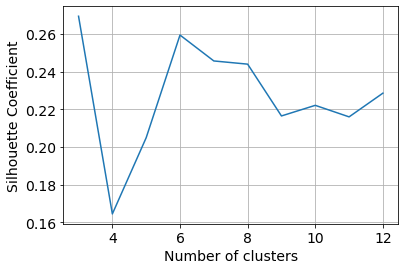

In [78]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

In [85]:
#k=6 as it has the high sc score and decent segment distribution 
km6 = KMeans(n_clusters=6, random_state=123).fit(PCs)

In [86]:
cust_data_new['clust6'] = km6.labels_

In [87]:
cust_data_new.clust6.value_counts()/cust_data_new.clust6.value_counts().sum()  # Segment distribution

0    0.482289
4    0.175749
1    0.163488
5    0.091281
3    0.048365
2    0.038828
Name: clust6, dtype: float64

#### Profiling

In [88]:
km3 = KMeans(n_clusters=3, random_state=123).fit(PCs)
km4 = KMeans(n_clusters=4, random_state=123).fit(PCs)
km5 = KMeans(n_clusters=5, random_state=123).fit(PCs)
km6 = KMeans(n_clusters=6, random_state=123).fit(PCs)
km7 = KMeans(n_clusters=7, random_state=123).fit(PCs)
km8 = KMeans(n_clusters=8, random_state=123).fit(PCs)

In [89]:
cust_data_new['clust3'] = km3.labels_
cust_data_new['clust4'] = km4.labels_
cust_data_new['clust5'] = km5.labels_
cust_data_new['clust6'] = km6.labels_
cust_data_new['clust7'] = km7.labels_
cust_data_new['clust8'] = km8.labels_

In [90]:
print(silhouette_score(PCs, km3.labels_))
print(silhouette_score(PCs, km4.labels_))
print(silhouette_score(PCs, km5.labels_))
print(silhouette_score(PCs, km6.labels_))
print(silhouette_score(PCs, km7.labels_))
print(silhouette_score(PCs, km8.labels_))

0.26951886381067874
0.16447206694462155
0.2049669157354643
0.2595270901434095
0.24576232352986013
0.24406351548171518


In [91]:
seg_dist = pd.concat([pd.Series(cust_data_new.clust3.count())/cust_data_new.clust3.count(),
           cust_data_new.clust3.value_counts().sort_index()/sum(cust_data_new.clust3.value_counts()),
           cust_data_new.clust4.value_counts().sort_index()/sum(cust_data_new.clust4.value_counts()),
           cust_data_new.clust5.value_counts().sort_index()/sum(cust_data_new.clust5.value_counts()),
           cust_data_new.clust6.value_counts().sort_index()/sum(cust_data_new.clust6.value_counts()),
           cust_data_new.clust7.value_counts().sort_index()/sum(cust_data_new.clust7.value_counts()),
           cust_data_new.clust8.value_counts().sort_index()/sum(cust_data_new.clust8.value_counts())])

In [92]:
seg_dist 

0    1.000000
0    0.722071
1    0.044959
2    0.232970
0    0.243188
1    0.039510
2    0.190736
3    0.526567
0    0.454360
1    0.039510
2    0.243869
3    0.170981
4    0.091281
0    0.482289
1    0.163488
2    0.038828
3    0.048365
4    0.175749
5    0.091281
0    0.091962
1    0.173025
2    0.420981
3    0.078338
4    0.048365
5    0.166213
6    0.021117
0    0.170981
1    0.073569
2    0.283379
3    0.021117
4    0.139646
5    0.091281
6    0.048365
7    0.171662
dtype: float64

In [93]:
agg = pd.concat([cust_data_new.apply(np.mean).T,
           cust_data_new.groupby('clust3').apply(np.mean).T,
           cust_data_new.groupby('clust4').apply(np.mean).T,
           cust_data_new.groupby('clust5').apply(np.mean).T,
           cust_data_new.groupby('clust6').apply(np.mean).T,
           cust_data_new.groupby('clust7').apply(np.mean).T,
           cust_data_new.groupby('clust8').apply(np.mean).T], axis=1)

In [94]:
profiling = pd.concat([pd.DataFrame(seg_dist).T, agg],axis=0)

In [95]:
profiling.columns = ['overall',
                    'KM3_1', 'KM3_2', 'KM3_3',
                    'KM4_1', 'KM4_2', 'KM4_3','KM4_4',
                    'KM5_1', 'KM5_2', 'KM5_3','KM5_4', 'KM5_5',
                    'KM6_1', 'KM6_2', 'KM6_3','KM6_4', 'KM6_5', 'KM6_6',
                    'KM7_1', 'KM7_2', 'KM7_3','KM7_4', 'KM7_5', 'KM7_6','KM7_7',
                    'KM8_1', 'KM8_2', 'KM8_3','KM8_4', 'KM8_5', 'KM8_6', 'KM8_7', 'KM8_8']

In [96]:
profiling

,overall,KM3_1,KM3_2,KM3_3,KM4_1,KM4_2,KM4_3,KM4_4,KM5_1,KM5_2,...,KM7_6,KM7_7,KM8_1,KM8_2,KM8_3,KM8_4,KM8_5,KM8_6,KM8_7,KM8_8
0,1.000000,0.722071,0.044959,0.232970,0.243188,0.039510,0.190736,0.526567,0.454360,0.039510,...,0.166213,0.021117,0.170981,0.073569,0.283379,0.021117,0.139646,0.091281,0.048365,0.171662
Gender,0.363760,0.350000,0.348485,0.409357,0.364146,0.362069,0.375000,0.359638,0.361319,0.362069,...,0.385246,0.419355,1.000000,0.370370,0.000000,0.419355,0.297561,0.358209,0.464789,0.349206
Apparel,456.798940,198.882603,2349.801595,890.872453,223.095145,2421.853998,1030.642733,209.428694,217.184632,2421.853998,...,731.926949,2866.491554,221.583824,1474.117108,174.169684,2866.491554,828.209922,290.385300,411.407185,224.358156
Coupon_used,11.572207,5.653774,53.181818,21.885965,6.859944,55.620690,24.014286,5.936611,6.256372,55.620690,...,18.663934,65.548387,6.589641,34.796296,5.165865,65.548387,20.092683,6.686567,10.802817,6.400794
Delivery_Charges,349.009599,149.789594,1765.689561,693.080731,184.322297,1806.205821,779.335084,159.856753,168.194423,1806.205821,...,581.220574,2230.622181,177.267291,1091.647069,136.352380,2230.622181,644.779512,196.359254,316.041127,171.235635
Drinkware,145.058728,53.327781,877.814654,287.961985,68.246236,910.468165,325.683564,57.676269,60.773910,910.468165,...,209.726480,1143.416802,68.702620,559.063880,49.203322,1143.416802,234.621456,69.919142,86.835922,62.605317
Frequency,34.140702,16.888679,152.690152,64.733918,20.450980,159.733621,70.889286,17.728331,18.496252,159.733621,...,54.721311,188.050000,19.318725,102.407407,15.617788,188.050000,59.019512,20.902985,31.661972,18.789683
Lifestyle,71.250673,24.524629,474.804384,138.195295,29.879801,491.175862,154.839799,28.571222,29.181838,491.175862,...,103.600942,589.896268,26.378322,264.045685,21.694951,589.896268,115.070773,48.845981,66.828014,28.835523
Nest_USA,1532.913744,743.914716,6658.024800,2989.292810,945.843881,6914.650616,3237.237728,782.891089,807.345402,6914.650616,...,2536.776784,8656.429066,888.770374,4397.749258,680.988400,8656.429066,2694.889563,966.435296,1570.045449,822.264685
Office,216.495621,76.013931,1304.395516,441.961115,99.504100,1367.272413,493.939409,83.684054,86.234797,1367.272413,...,355.913766,1625.622276,86.478961,800.001302,75.043281,1625.622276,389.647377,106.934112,168.931379,86.888513


In [97]:
#Profiling for km6
cust_data_new.groupby('clust6').apply(np.mean).T

clust6,0,1,2,3,4,5
Gender,0.361582,0.358333,0.368421,0.464789,0.348837,0.358209
Apparel,208.741112,1059.751133,2451.887861,411.407185,234.777971,290.385300
Coupon_used,6.264124,24.875000,56.210526,10.802817,6.651163,6.686567
Delivery_Charges,168.102429,811.483764,1817.889256,316.041127,179.080310,196.359254
Drinkware,62.179353,353.815144,907.007604,86.835922,65.014140,69.919142
Frequency,18.730226,73.250000,161.185088,31.661972,19.538760,20.902985
Lifestyle,26.399501,162.065449,489.591298,66.828014,30.281311,48.845981
Nest_USA,842.884574,3308.586949,6947.676241,1570.045449,862.407475,966.435296
Office,90.025817,522.164757,1369.820134,168.931379,94.398082,106.934112
Quantity,65.104520,363.179167,893.700877,113.760563,66.496124,93.544776


## Predicting Customer Lifetime value

In [98]:
cust_data_n=cust_data.copy()

In [99]:
cust_data_n.head(1)

,Gender,Apparel,Coupon_used,Delivery_Charges,Drinkware,Frequency,Lifestyle,Nest_USA,Office,Quantity,Recency,Revenue,Tenure_Months,Location_Chicago,Location_New Jersey,Location_New York,Location_Washington DC
CustomerID,,,,,,,,,,,,,,,,,
17850,1,3221.10062,77.0,2618.9034,1717.05178,215.97,805.8643,10011.688766,2332.038394,1125.0,339.0,20518.064346,12,1,0,0,0


In [100]:
quantiles = cust_data_n[['Revenue']].quantile(q=[0.33,0.67])
quantiles

,Revenue
0.33,940.351363
0.67,3035.112030


In [101]:
cust_data_n['value_seg'] = np.where(cust_data_n.Revenue<=940.351363,1, np.where(cust_data_n.Revenue<=3035.112030, 2, 3))
#value_seg 1 = Low value
#value_seg 2 = mid value
#value_seg 3 = high value

In [102]:
y=cust_data_n.value_seg
x=cust_data_n[cust_data_n.columns.difference(['value_seg','Revenue'])]

In [103]:
# VIF 
def VIF(x, drop=[]):
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    x = x.drop(columns=drop)
    output = pd.DataFrame()
    output['Columns'] = x.columns
    x = x.values.astype(float)
    output['VIF'] = [variance_inflation_factor(x, i) for i in range(x.shape[1])]

    return output.sort_values('VIF', ascending=False)
d = VIF(x,drop=['Frequency','Coupon_used'])
d

,Columns,VIF
1,Delivery_Charges,10.036327
11,Quantity,8.856592
10,Office,5.724579
9,Nest_USA,4.580379
0,Apparel,3.409504
13,Tenure_Months,3.056676
2,Drinkware,2.715630
4,Lifestyle,2.602105
12,Recency,2.356040
5,Location_Chicago,1.692052


In [104]:
#Now all variables vif < 10. So we consider these variables for further calculations

In [105]:
final_x=x.drop(columns=['Frequency','Coupon_used'])

In [106]:
#Splitting the data for sklearn methods
train_y, test_y, train_X, test_X = train_test_split(y,final_x, test_size=0.3, random_state=123)

In [107]:
# we have almost equal samples of all the target variable
train_y.value_counts()

2    365
3    331
1    331
Name: value_seg, dtype: int64

#### Decision Tree Model

In [108]:
param_grid = {'max_depth': np.arange(3, 12),
             'max_features': np.arange(10,29)}

In [93]:
tree = GridSearchCV(DecisionTreeClassifier(random_state=123), param_grid, cv = 10)
tree.fit( train_X, train_y )

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=123),
             param_grid={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11]),
                         'max_features': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28])})

In [94]:
tree.best_params_

{'max_depth': 5, 'max_features': 11}

In [82]:
tree.best_score_

0.8607938320959452

In [95]:
clf_tree = DecisionTreeClassifier( max_depth = 5, max_features=11, random_state=123 )
clf_tree.fit( train_X, train_y )

DecisionTreeClassifier(max_depth=5, max_features=11, random_state=123)

In [96]:
tree_train_pred = pd.DataFrame( { 'actual':  train_y,
                            'predicted': clf_tree.predict( train_X ) } )

In [97]:
tree_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': clf_tree.predict( test_X ) } )

In [98]:
print(metrics.classification_report(tree_train_pred.actual, tree_train_pred.predicted))

              precision    recall  f1-score   support

           1       0.93      0.95      0.94       331
           2       0.89      0.91      0.90       365
           3       0.97      0.93      0.95       331

    accuracy                           0.93      1027
   macro avg       0.93      0.93      0.93      1027
weighted avg       0.93      0.93      0.93      1027



In [99]:
print(metrics.classification_report(tree_test_pred.actual, tree_test_pred.predicted))

              precision    recall  f1-score   support

           1       0.89      0.92      0.90       154
           2       0.77      0.82      0.79       133
           3       0.96      0.86      0.91       154

    accuracy                           0.87       441
   macro avg       0.87      0.87      0.87       441
weighted avg       0.88      0.87      0.87       441



### Random forest model

In [101]:
pargrid_rf = {'n_estimators': [50,60,70,80,90,100],
                  'max_features': [2,3,4,5,6,7,8,9,10]}
gscv_rf = GridSearchCV(estimator=RandomForestClassifier(), 
                        param_grid=pargrid_rf, 
                        cv=10,
                        verbose=True, n_jobs=-1)

gscv_results = gscv_rf.fit(train_X, train_y) 

Fitting 10 folds for each of 54 candidates, totalling 540 fits


In [102]:
gscv_results.best_params_

{'max_features': 3, 'n_estimators': 100}

In [103]:
gscv_rf.best_score_

0.9007138777841235

In [104]:
radm_clf_new1 = RandomForestClassifier(random_state=123,oob_score=True,n_estimators=100, max_features=3, n_jobs=-1)
radm_clf_new1.fit(train_X, train_y)

RandomForestClassifier(max_features=3, n_jobs=-1, oob_score=True,
                       random_state=123)

In [105]:
radm_train_pred1 = pd.DataFrame( { 'actual':  train_y,
                            'predicted': radm_clf_new1.predict( train_X ) } )

In [106]:
radm_test_pred1 = pd.DataFrame( { 'actual':  test_y,
                            'predicted': radm_clf_new1.predict( test_X ) } )

In [107]:
print(metrics.classification_report(radm_train_pred1.actual, radm_train_pred1.predicted))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       331
           2       1.00      1.00      1.00       365
           3       1.00      1.00      1.00       331

    accuracy                           1.00      1027
   macro avg       1.00      1.00      1.00      1027
weighted avg       1.00      1.00      1.00      1027



In [108]:
print(metrics.classification_report(radm_test_pred1.actual, radm_test_pred1.predicted))

              precision    recall  f1-score   support

           1       0.92      0.91      0.92       154
           2       0.78      0.87      0.83       133
           3       0.96      0.88      0.92       154

    accuracy                           0.89       441
   macro avg       0.89      0.89      0.89       441
weighted avg       0.89      0.89      0.89       441



### XG-Boost

In [109]:
from xgboost import XGBClassifier

In [232]:
parameters = { 'max_depth': range (2, 10, 1),
    'n_estimators': [500,1000],
    'learning_rate': [0.1, 0.01, 0.05],
      'gamma':[0,1],
    'reg_alpa':[0,1]}

grid_search = GridSearchCV(
    estimator=XGBClassifier(),
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = -1,
    cv = 3,
    verbose=True)
grid_search.fit(train_X, train_y)

Fitting 3 folds for each of 192 candidates, totalling 576 fits
[15:40:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "reg_alpa" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:40:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight

In [233]:
grid_search.best_params_

{'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 2,
 'n_estimators': 500,
 'reg_alpa': 0}

In [235]:
xgb_estimator = XGBClassifier( learning_rate=0.1,
                               n_estimators=500,
                               max_depth=2,
                               gamma=0,
                               n_jobs=-1,
                               reg_alpa=0,
                               random_state=42)
xgb_estimator.fit(train_X, train_y)

[15:43:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "reg_alpa" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:43:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=500, n_jobs=-1,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=42, reg_alpa=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=None, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [236]:
print(metrics.classification_report(train_y, xgb_estimator.predict(train_X)))

              precision    recall  f1-score   support

           1       0.99      1.00      1.00       331
           2       1.00      0.99      0.99       365
           3       1.00      1.00      1.00       331

    accuracy                           1.00      1027
   macro avg       1.00      1.00      1.00      1027
weighted avg       1.00      1.00      1.00      1027



In [237]:
print(metrics.classification_report(test_y, xgb_estimator.predict(test_X)))

              precision    recall  f1-score   support

           1       0.93      0.93      0.93       154
           2       0.83      0.86      0.85       133
           3       0.95      0.92      0.94       154

    accuracy                           0.91       441
   macro avg       0.90      0.91      0.90       441
weighted avg       0.91      0.91      0.91       441



### SVC

In [114]:
model = SVC(kernel='rbf', class_weight='balanced')

In [115]:
model.fit(train_X, train_y)

SVC(class_weight='balanced')

In [116]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

grid.fit(train_X, train_y)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [1, 5, 10, 50],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005]})

In [117]:
print(grid.best_params_)

{'C': 5, 'gamma': 0.0001}


In [118]:
model = grid.best_estimator_

In [119]:
print(metrics.classification_report(train_y, model.predict(train_X)))

              precision    recall  f1-score   support

           1       0.99      1.00      1.00       331
           2       1.00      0.99      1.00       365
           3       1.00      1.00      1.00       331

    accuracy                           1.00      1027
   macro avg       1.00      1.00      1.00      1027
weighted avg       1.00      1.00      1.00      1027



In [120]:
print(metrics.classification_report(test_y, model.predict(test_X)))

              precision    recall  f1-score   support

           1       0.93      0.84      0.88       154
           2       0.77      0.47      0.58       133
           3       0.66      0.95      0.78       154

    accuracy                           0.76       441
   macro avg       0.78      0.75      0.75       441
weighted avg       0.79      0.76      0.75       441



## Market Basket Analysis

In [138]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [139]:
df=online_sales.copy()

In [140]:
# Clean up spaces in description and making Transaction_ID as str
df['Product_Description']=df['Product_Description'].str.strip()
df['Transaction_ID']=df['Transaction_ID'].astype('str')

In [141]:
basket=(df.groupby(['Transaction_ID','Product_Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('Transaction_ID'))

In [142]:
#we need to consolidate the items into 1 transaction per row with each product 1 hot encoded.
# Convert the units to 1 hot encoded values
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1   

In [143]:
basket_sets = basket.applymap(encode_units)

In [144]:
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)

In [145]:
frequent_itemsets.sort_values(by='support', ascending=False)

,support,itemsets
29,0.140098,(Nest Learning Thermostat 3rd Gen-USA - Stainl...
27,0.132796,(Nest Cam Outdoor Security Camera - USA)
26,0.128886,(Nest Cam Indoor Security Camera - USA)
31,0.054307,(Nest Protect Smoke + CO White Battery Alarm-USA)
30,0.043454,(Nest Learning Thermostat 3rd Gen-USA - White)
32,0.042496,(Nest Protect Smoke + CO White Wired Alarm-USA)
34,0.033678,(Nest Thermostat E - USA)
11,0.032162,(Google Laptop and Cell Phone Stickers)
21,0.027692,(Google Sunglasses)
39,0.027653,"(Nest Cam Outdoor Security Camera - USA, Nest ..."


In [163]:
#Generate the rules with their corresponding support, confidence and lift:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.01)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Nest Cam Outdoor Security Camera - USA),(Nest Cam Indoor Security Camera - USA),0.132796,0.128886,0.027653,0.208233,1.615644,0.010537,1.100216
1,(Nest Cam Indoor Security Camera - USA),(Nest Cam Outdoor Security Camera - USA),0.128886,0.132796,0.027653,0.214551,1.615644,0.010537,1.104087
2,(Nest Cam Outdoor Security Camera - USA),(Nest Learning Thermostat 3rd Gen-USA - Stainl...,0.132796,0.140098,0.012011,0.090445,0.645581,-0.006594,0.945409
3,(Nest Learning Thermostat 3rd Gen-USA - Stainl...,(Nest Cam Outdoor Security Camera - USA),0.140098,0.132796,0.012011,0.085731,0.645581,-0.006594,0.948521


## Predicting Next Purchase Day

In [164]:
tenure=(data.groupby('CustomerID')['Transaction_Date'].max())-(data.groupby('CustomerID')['Transaction_Date'].min())
tenure=tenure.dt.days.astype('int32')
tenure.rename('tenure',inplace=True)

CustomerID
12346      0
12347    223
12348    119
12350      0
12356      0
        ... 
18259      0
18260    105
18269     76
18277      0
18283     73
Name: tenure, Length: 1468, dtype: int32

In [165]:
cust_data_n=pd.concat([cust_data,tenure],axis=1)

In [166]:
cust_data_n[cust_data_n.index==12346]

,Gender,Apparel,Coupon_used,Delivery_Charges,Drinkware,Frequency,Lifestyle,Nest_USA,Office,Quantity,Recency,Revenue,Tenure_Months,Location_Chicago,Location_New Jersey,Location_New York,Location_Washington DC,tenure
CustomerID,,,,,,,,,,,,,,,,,,
12346,0,91.51174,2.0,150.0,0.0,2.0,0.0,0.0,83.47,3.0,107.0,174.98174,31,0,0,1,0,0


In [167]:
cust_data_n['avg_days']=(cust_data_n.tenure)/(cust_data_n.Frequency)

In [168]:
# adding dependent variable
cust_data_n['flag']=np.where(cust_data_n.avg_days<=30,1,np.where(cust_data_n.avg_days<=60,2,np.where(cust_data_n.avg_days<=90,3,4)))

In [169]:
#less than 30 days = 1
#between 30-60 = 2
#between 60-90 = 3
#above 90 = 4

In [170]:
#dropping variables used to derive target vaiable
cust_data_n.drop(columns=['Frequency','avg_days','tenure'],inplace=True)

In [171]:
cust_data_n.flag.value_counts()

1    1456
2       8
3       4
Name: flag, dtype: int64

In [172]:
# VIF 
def VIF(x, drop=[]):
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    x = x.drop(columns=drop)
    output = pd.DataFrame()
    output['Columns'] = x.columns
    x = x.values.astype(float)
    output['VIF'] = [variance_inflation_factor(x, i) for i in range(x.shape[1])]

    return output.sort_values('VIF', ascending=False)
d = VIF(x,drop=['Frequency','Coupon_used'])
d

,Columns,VIF
1,Delivery_Charges,10.036327
11,Quantity,8.856592
10,Office,5.724579
9,Nest_USA,4.580379
0,Apparel,3.409504
13,Tenure_Months,3.056676
2,Drinkware,2.715630
4,Lifestyle,2.602105
12,Recency,2.356040
5,Location_Chicago,1.692052


In [173]:
df=cust_data_n[cust_data_n.columns.difference(['flag','Frequency','Coupon_used'])]
y=cust_data_n.flag

In [206]:
train_Xm,test_Xm,train_ym,test_ym=train_test_split(df,y,test_size=0.30,random_state=1243)

In [211]:
#Data is almost balanced
train_ym.value_counts()

1    736
3    705
2    701
dtype: int64

#### Decision Tree Model

In [179]:
param_grid = {'max_depth': np.arange(3, 12),
             'max_features': np.arange(10,29)}

In [212]:
tree = GridSearchCV(DecisionTreeClassifier(random_state=123), param_grid, cv = 5)
tree.fit( train_Xm, train_ym)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=123),
             param_grid={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11]),
                         'max_features': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28])})

In [213]:
tree.best_params_

{'max_depth': 7, 'max_features': 10}

In [194]:
tree.best_score_

0.9912621359223301

In [214]:
clf_tree = DecisionTreeClassifier( max_depth = 7, max_features=10, random_state=123 )
clf_tree.fit( df, y )

DecisionTreeClassifier(max_depth=7, max_features=10, random_state=123)

In [215]:
tree_train_pred = pd.DataFrame( { 'actual':  train_ym,
                            'predicted': clf_tree.predict( train_Xm ) } )

In [216]:
tree_test_pred = pd.DataFrame( { 'actual':  test_ym,
                            'predicted': clf_tree.predict( test_Xm ) } )

In [217]:
print(metrics.classification_report(tree_train_pred.actual, tree_train_pred.predicted))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       736
           2       1.00      1.00      1.00       701
           3       1.00      1.00      1.00       705

    accuracy                           1.00      2142
   macro avg       1.00      1.00      1.00      2142
weighted avg       1.00      1.00      1.00      2142



In [218]:
print(metrics.classification_report(tree_test_pred.actual, tree_test_pred.predicted))

              precision    recall  f1-score   support

           1       0.99      0.99      0.99       284
           2       0.99      0.99      0.99       319
           3       1.00      1.00      1.00       315

    accuracy                           0.99       918
   macro avg       0.99      0.99      0.99       918
weighted avg       0.99      0.99      0.99       918



### Random Forest

In [219]:
pargrid_rf = {'n_estimators': [50,60,70,80,90,100],
                  'max_features': [2,3,4,5,6,7,8,9,10]}
gscv_rf = GridSearchCV(estimator=RandomForestClassifier(), 
                        param_grid=pargrid_rf, 
                        cv=10,
                        verbose=True, n_jobs=-1)

gscv_results = gscv_rf.fit(train_Xm, train_ym) 

Fitting 10 folds for each of 54 candidates, totalling 540 fits


In [220]:
gscv_results.best_params_

{'max_features': 2, 'n_estimators': 60}

In [221]:
radm_clf_new1 = RandomForestClassifier(random_state=123,oob_score=True,n_estimators=60, max_features=2, n_jobs=-1)
radm_clf_new1.fit(train_Xm, train_ym)

RandomForestClassifier(max_features=2, n_estimators=60, n_jobs=-1,
                       oob_score=True, random_state=123)

In [227]:
#train
print(metrics.classification_report(train_ym, radm_clf_new1.predict(train_Xm)))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       736
           2       1.00      1.00      1.00       701
           3       1.00      1.00      1.00       705

    accuracy                           1.00      2142
   macro avg       1.00      1.00      1.00      2142
weighted avg       1.00      1.00      1.00      2142



In [226]:
#test
print(metrics.classification_report(test_ym, radm_clf_new1.predict(test_Xm)))

              precision    recall  f1-score   support

           1       0.99      1.00      0.99       284
           2       1.00      0.99      1.00       319
           3       1.00      1.00      1.00       315

    accuracy                           1.00       918
   macro avg       1.00      1.00      1.00       918
weighted avg       1.00      1.00      1.00       918



### XG Boost

In [238]:
parameters = { 'max_depth': range (2, 10, 1),
    'n_estimators': [500,1000],
    'learning_rate': [0.1, 0.01, 0.05],
      'gamma':[0,1],
    'reg_alpa':[0,1]}

grid_search = GridSearchCV(
    estimator=XGBClassifier(),
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = -1,
    cv = 3,
    verbose=True)
grid_search.fit(train_Xm, train_ym)

Fitting 3 folds for each of 192 candidates, totalling 576 fits
[16:07:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "reg_alpa" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:07:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight

In [239]:
grid_search.best_params_

{'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 2,
 'n_estimators': 500,
 'reg_alpa': 0}

In [240]:
xgb_estimator = XGBClassifier( learning_rate=0.1,
                               n_estimators=500,
                               max_depth=2,
                               gamma=0,
                               n_jobs=-1,
                               reg_alpa=0,
                               random_state=42)
xgb_estimator.fit(train_Xm, train_ym)

[16:09:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "reg_alpa" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:09:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=500, n_jobs=-1,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=42, reg_alpa=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=None, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [241]:
#train
print(metrics.classification_report(train_ym, xgb_estimator.predict(train_Xm)))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       736
           2       1.00      1.00      1.00       701
           3       1.00      1.00      1.00       705

    accuracy                           1.00      2142
   macro avg       1.00      1.00      1.00      2142
weighted avg       1.00      1.00      1.00      2142



In [242]:
#test
print(metrics.classification_report(test_ym, xgb_estimator.predict(test_Xm)))

              precision    recall  f1-score   support

           1       0.99      0.99      0.99       284
           2       1.00      0.99      1.00       319
           3       0.99      1.00      1.00       315

    accuracy                           0.99       918
   macro avg       0.99      0.99      0.99       918
weighted avg       0.99      0.99      0.99       918



### Naive Bayes

In [225]:
nb=MultinomialNB()
nb.fit(train_Xm,train_ym)

MultinomialNB()

In [228]:
#test
print(metrics.classification_report(train_ym, nb.predict(train_Xm)))

              precision    recall  f1-score   support

           1       1.00      0.66      0.80       736
           2       0.82      0.96      0.88       701
           3       0.84      1.00      0.92       705

    accuracy                           0.87      2142
   macro avg       0.89      0.87      0.87      2142
weighted avg       0.89      0.87      0.87      2142



In [229]:
#test
print(metrics.classification_report(test_ym, nb.predict(test_Xm)))

              precision    recall  f1-score   support

           1       1.00      0.63      0.78       284
           2       0.82      0.96      0.88       319
           3       0.86      1.00      0.93       315

    accuracy                           0.87       918
   macro avg       0.89      0.86      0.86       918
weighted avg       0.89      0.87      0.87       918



### Cohort Analysis 

In [253]:
x=data.groupby('CustomerID')['Transaction_Date'].min()
x=x.to_frame().reset_index()
x['start_month']=x.Transaction_Date.dt.month_name()
data=pd.merge(left=data,right=x.loc[:,['CustomerID','start_month']],on='CustomerID',how='inner')

In [411]:
df=pd.DataFrame()
l1=['January','February','March','April','May','June','July','August','September','October','November','December']
l2=['January','February','March','April','May','June','July','August','September','October','November','December']   

for i,j in zip(l1,l2):
    i=data[data.start_month==j]
    retention=len(i[i.Month==i[i.Month!=j].Transaction_Date.min().month_name()].CustomerID.unique())/len(i.CustomerID.unique())
    retention=pd.Series(retention).to_frame(name='Retention').T
    mean=i.select_dtypes(np.number).mean().T
    mean=mean.to_frame().drop(index=['CustomerID','Transaction_ID'])
    mode=i.select_dtypes(['object']).mode().T
    Number_transaction=i.Transaction_ID.count()
    Number_transaction=pd.Series(Number_transaction).to_frame(name='Number_transaction').T
    i=pd.concat([retention,mean,mode,Number_transaction],axis=0)
    i.columns=[j]
    df=pd.concat([df,i],axis=1)
    
    
df    

,January,February,March,April,May,June,July,August,September,October,November,December
Retention,0.060465,0.072917,0.101695,0.08589,0.107143,0.145985,0.129032,0.102941,0.076923,0.068966,0.102941,0.0
Quantity,5.045945,4.367994,5.030136,4.514274,3.917352,4.593666,3.960544,3.829354,5.277601,4.271049,4.013751,3.153599
Avg_Price,54.033236,52.141569,47.562515,49.725583,45.696421,47.335424,49.10835,43.191915,45.638254,67.083291,81.80016,77.534516
Delivery_Charges,12.219721,12.01859,11.040301,9.759326,8.993697,9.038875,8.151939,9.170022,9.691587,12.432323,8.312574,8.490348
GST,0.13643,0.138383,0.139908,0.138659,0.141786,0.139981,0.139408,0.143079,0.14026,0.129617,0.119334,0.123388
Discount_pct,0.166574,0.205768,0.245651,0.145497,0.194512,0.265432,0.134082,0.202387,0.296603,0.104953,0.201815,0.3
invoice_value,101.158482,88.714658,84.804126,94.350958,74.628679,72.632303,84.013666,71.402148,72.418633,113.40297,114.434383,95.493782
Tenure_Months,27.636313,25.989764,24.173444,26.351427,25.428349,25.855609,26.058844,25.47911,26.781316,25.397118,26.960946,28.205869
m,4.743796,5.160032,5.546914,5.891033,6.428127,7.203435,7.889796,8.395822,9.04724,10.049527,11.018152,12.0
Product_SKU,GGOENEBJ079499,GGOENEBJ079499,GGOENEBQ078999,GGOENEBQ078999,GGOENEBQ078999,GGOENEBQ078999,GGOENEBB078899,GGOENEBB078899,GGOENEBJ079499,GGOENEBQ078999,GGOENEBJ079499,GGOENEBJ079499
